In [16]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem import rdMolHash
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('ferroptosis_features.csv')

print("MORGAN_bit_198 - Class Distribution:")
print(df[df['MORGAN_bit_198'] == 1]['Class'].value_counts())
print(f"Inhibitor %: {(df[df['MORGAN_bit_198'] == 1]['Class'] == 'Ferroptosis-Inhibitor').sum() / (df['MORGAN_bit_198'] == 1).sum() * 100:.1f}%")

print("\nMORGAN_bit_1683 - Class Distribution:")
print(df[df['MORGAN_bit_1683'] == 1]['Class'].value_counts())
print(f"Inducer %: {(df[df['MORGAN_bit_1683'] == 1]['Class'] == 'Ferroptosis-Inducer').sum() / (df['MORGAN_bit_1683'] == 1).sum() * 100:.1f}%")

MORGAN_bit_198 - Class Distribution:
Class
Ferroptosis-Inhibitor    170
Ferroptosis-Inducer        8
Name: count, dtype: int64
Inhibitor %: 95.5%

MORGAN_bit_1683 - Class Distribution:
Class
Ferroptosis-Inducer      260
Ferroptosis-Inhibitor     78
Name: count, dtype: int64
Inducer %: 76.9%


In [13]:
from rdkit.Chem import Fragments, Descriptors
import pandas as pd
from rdkit import Chem

df = pd.read_csv('ferroptosis_features.csv')

def count_functional_groups(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return {}
    
    return {
        'Aromatic_Rings': Chem.Lipinski.NumAromaticRings(mol),
        'Aliphatic_Rings': Chem.Lipinski.NumAliphaticRings(mol),
        'Primary_Amine': Fragments.fr_NH2(mol),
        'Secondary_Amine': Fragments.fr_NH1(mol),
        'Tertiary_Amine': Fragments.fr_NH0(mol),
        'Phenol': Fragments.fr_phenol(mol),
        'Alcohol': Fragments.fr_Al_OH(mol),
        'Carbonyl': Fragments.fr_C_O(mol),
        'Carboxylic_Acid': Fragments.fr_COO(mol),
        'Ester': Fragments.fr_ester(mol),
        'Ether': Fragments.fr_ether(mol),
        'Ketone': Fragments.fr_ketone(mol),
        'Aldehyde': Fragments.fr_aldehyde(mol),
        'Amide': Fragments.fr_amide(mol),
        'Aniline': Fragments.fr_aniline(mol),
        'Nitro': Fragments.fr_nitro(mol),
        'Halogen': Fragments.fr_halogen(mol),
        'Sulfone': Fragments.fr_sulfone(mol),
        'HBD': Descriptors.NumHDonors(mol),
        'HBA': Descriptors.NumHAcceptors(mol)
    }

bit_198_present = df[df['MORGAN_bit_198'] == 1].copy()
bit_198_absent = df[df['MORGAN_bit_198'] == 0].copy()

bit_1683_present = df[df['MORGAN_bit_1683'] == 1].copy()
bit_1683_absent = df[df['MORGAN_bit_1683'] == 0].copy()

fg_198_present = [count_functional_groups(s) for s in bit_198_present['SMILES']]
fg_198_absent = [count_functional_groups(s) for s in bit_198_absent['SMILES']]

fg_1683_present = [count_functional_groups(s) for s in bit_1683_present['SMILES']]
fg_1683_absent = [count_functional_groups(s) for s in bit_1683_absent['SMILES']]

df_198_present = pd.DataFrame(fg_198_present).mean()
df_198_absent = pd.DataFrame(fg_198_absent).mean()

df_1683_present = pd.DataFrame(fg_1683_present).mean()
df_1683_absent = pd.DataFrame(fg_1683_absent).mean()

comparison_198 = pd.DataFrame({
    'Functional_Group': df_198_present.index,
    'Bit_198_Present': df_198_present.values,
    'Bit_198_Absent': df_198_absent.values,
    'Difference': df_198_present.values - df_198_absent.values,
    'Fold_Change': df_198_present.values / (df_198_absent.values + 0.01)
}).sort_values('Difference', ascending=False)

comparison_1683 = pd.DataFrame({
    'Functional_Group': df_1683_present.index,
    'Bit_1683_Present': df_1683_present.values,
    'Bit_1683_Absent': df_1683_absent.values,
    'Difference': df_1683_present.values - df_1683_absent.values,
    'Fold_Change': df_1683_present.values / (df_1683_absent.values + 0.01)
}).sort_values('Difference', ascending=False)

print("="*80)
print("MORGAN_bit_198 (INHIBITOR MARKER) - Functional Group Enrichment")
print("="*80)
print(comparison_198.to_string(index=False))

print("\n" + "="*80)
print("MORGAN_bit_1683 (INDUCER MARKER) - Functional Group Enrichment")
print("="*80)
print(comparison_1683.to_string(index=False))

comparison_198.to_csv('bit_198_functional_groups.csv', index=False)
comparison_1683.to_csv('bit_1683_functional_groups.csv', index=False)

MORGAN_bit_198 (INHIBITOR MARKER) - Functional Group Enrichment
Functional_Group  Bit_198_Present  Bit_198_Absent  Difference  Fold_Change
         Aniline         2.022472        0.454857    1.567615     4.350739
 Secondary_Amine         1.668539        0.773143    0.895396     2.130568
  Aromatic_Rings         2.483146        1.846286    0.636860     1.337696
 Aliphatic_Rings         1.634831        1.228000    0.406831     1.320542
        Aldehyde         0.011236        0.009143    0.002093     0.586953
   Primary_Amine         0.191011        0.192571   -0.001560     0.942933
         Sulfone         0.005618        0.008571   -0.002953     0.302506
           Nitro         0.005618        0.049143   -0.043525     0.094990
             HBD         2.235955        2.393143   -0.157188     0.930430
           Ester         0.044944        0.210286   -0.165342     0.204025
 Carboxylic_Acid         0.033708        0.202286   -0.168578     0.158785
          Ketone         0.005618   

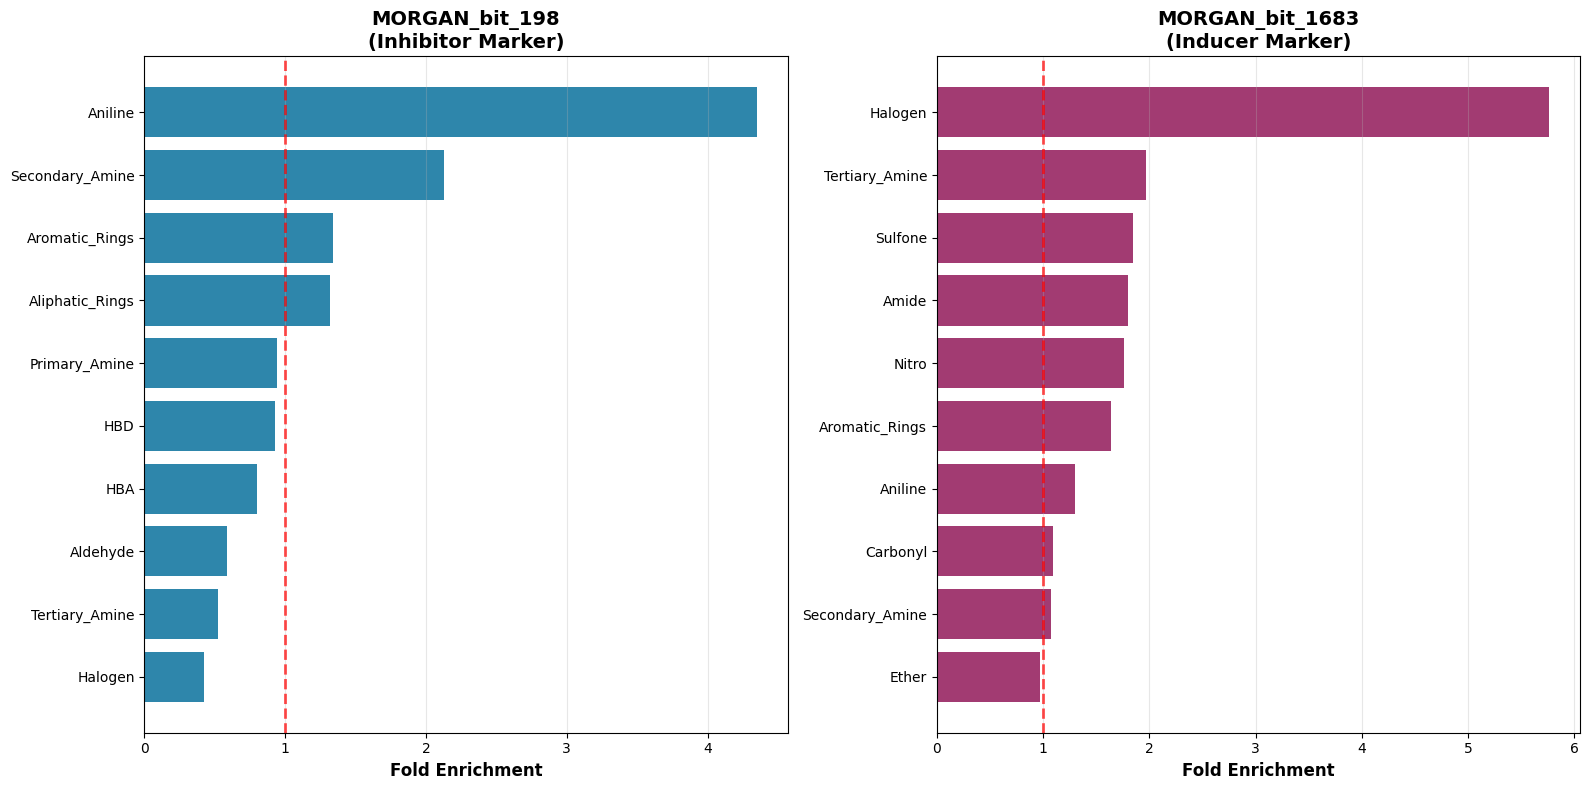

In [18]:
bit_198 = pd.read_csv('bit_198_functional_groups.csv')
bit_1683 = pd.read_csv('bit_1683_functional_groups.csv')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

top_198 = bit_198.nlargest(10, 'Fold_Change')
axes[0].barh(top_198['Functional_Group'], top_198['Fold_Change'], color='#2E86AB')
axes[0].axvline(x=1, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[0].set_xlabel('Fold Enrichment', fontsize=12, fontweight='bold')
axes[0].set_title('MORGAN_bit_198\n(Inhibitor Marker)', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

top_1683 = bit_1683.nlargest(10, 'Fold_Change')
axes[1].barh(top_1683['Functional_Group'], top_1683['Fold_Change'], color='#A23B72')
axes[1].axvline(x=1, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[1].set_xlabel('Fold Enrichment', fontsize=12, fontweight='bold')
axes[1].set_title('MORGAN_bit_1683\n(Inducer Marker)', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('functional_group_enrichment.png', dpi=300, bbox_inches='tight')
plt.show()

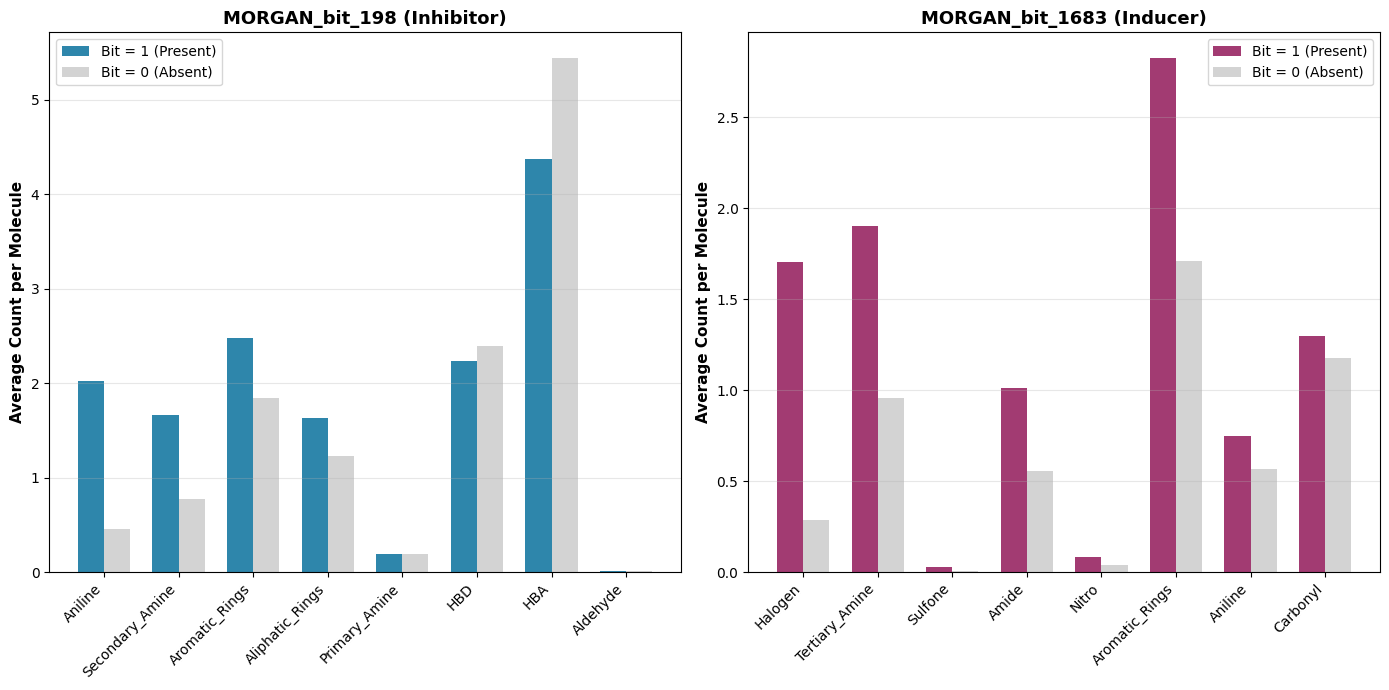

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

features_198 = bit_198.nlargest(8, 'Fold_Change')['Functional_Group'].tolist()
x_pos = np.arange(len(features_198))
present_198 = bit_198.nlargest(8, 'Fold_Change')['Bit_198_Present'].values
absent_198 = bit_198.nlargest(8, 'Fold_Change')['Bit_198_Absent'].values

width = 0.35
axes[0].bar(x_pos - width/2, present_198, width, label='Bit = 1 (Present)', color='#2E86AB')
axes[0].bar(x_pos + width/2, absent_198, width, label='Bit = 0 (Absent)', color='lightgray')
axes[0].set_ylabel('Average Count per Molecule', fontsize=11, fontweight='bold')
axes[0].set_title('MORGAN_bit_198 (Inhibitor)', fontsize=13, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(features_198, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

features_1683 = bit_1683.nlargest(8, 'Fold_Change')['Functional_Group'].tolist()
x_pos = np.arange(len(features_1683))
present_1683 = bit_1683.nlargest(8, 'Fold_Change')['Bit_1683_Present'].values
absent_1683 = bit_1683.nlargest(8, 'Fold_Change')['Bit_1683_Absent'].values

axes[1].bar(x_pos - width/2, present_1683, width, label='Bit = 1 (Present)', color='#A23B72')
axes[1].bar(x_pos + width/2, absent_1683, width, label='Bit = 0 (Absent)', color='lightgray')
axes[1].set_ylabel('Average Count per Molecule', fontsize=11, fontweight='bold')
axes[1].set_title('MORGAN_bit_1683 (Inducer)', fontsize=13, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(features_1683, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('functional_group_presence_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
summary_table = pd.DataFrame({
    'Marker': ['MORGAN_bit_198', 'MORGAN_bit_1683'],
    'Class': ['Inhibitor', 'Inducer'],
    'Top_Feature_1': [
        f"{bit_198.iloc[0]['Functional_Group']} ({bit_198.iloc[0]['Fold_Change']:.2f}x)",
        f"{bit_1683.iloc[0]['Functional_Group']} ({bit_1683.iloc[0]['Fold_Change']:.2f}x)"
    ],
    'Top_Feature_2': [
        f"{bit_198.iloc[1]['Functional_Group']} ({bit_198.iloc[1]['Fold_Change']:.2f}x)",
        f"{bit_1683.iloc[1]['Functional_Group']} ({bit_1683.iloc[1]['Fold_Change']:.2f}x)"
    ],
    'Top_Feature_3': [
        f"{bit_198.iloc[2]['Functional_Group']} ({bit_198.iloc[2]['Fold_Change']:.2f}x)",
        f"{bit_1683.iloc[2]['Functional_Group']} ({bit_1683.iloc[2]['Fold_Change']:.2f}x)"
    ],
    'Key_Characteristic': [
        'Aromatic amines, lower HBD',
        'Halogenated, higher tertiary amines'
    ]
})

summary_table.to_csv('functional_group_summary_table.csv', index=False)
print(summary_table.to_string(index=False))

         Marker     Class   Top_Feature_1           Top_Feature_2          Top_Feature_3                  Key_Characteristic
 MORGAN_bit_198 Inhibitor Aniline (4.35x) Secondary_Amine (2.13x) Aromatic_Rings (1.34x)          Aromatic amines, lower HBD
MORGAN_bit_1683   Inducer Halogen (5.77x)  Aromatic_Rings (1.64x) Tertiary_Amine (1.97x) Halogenated, higher tertiary amines


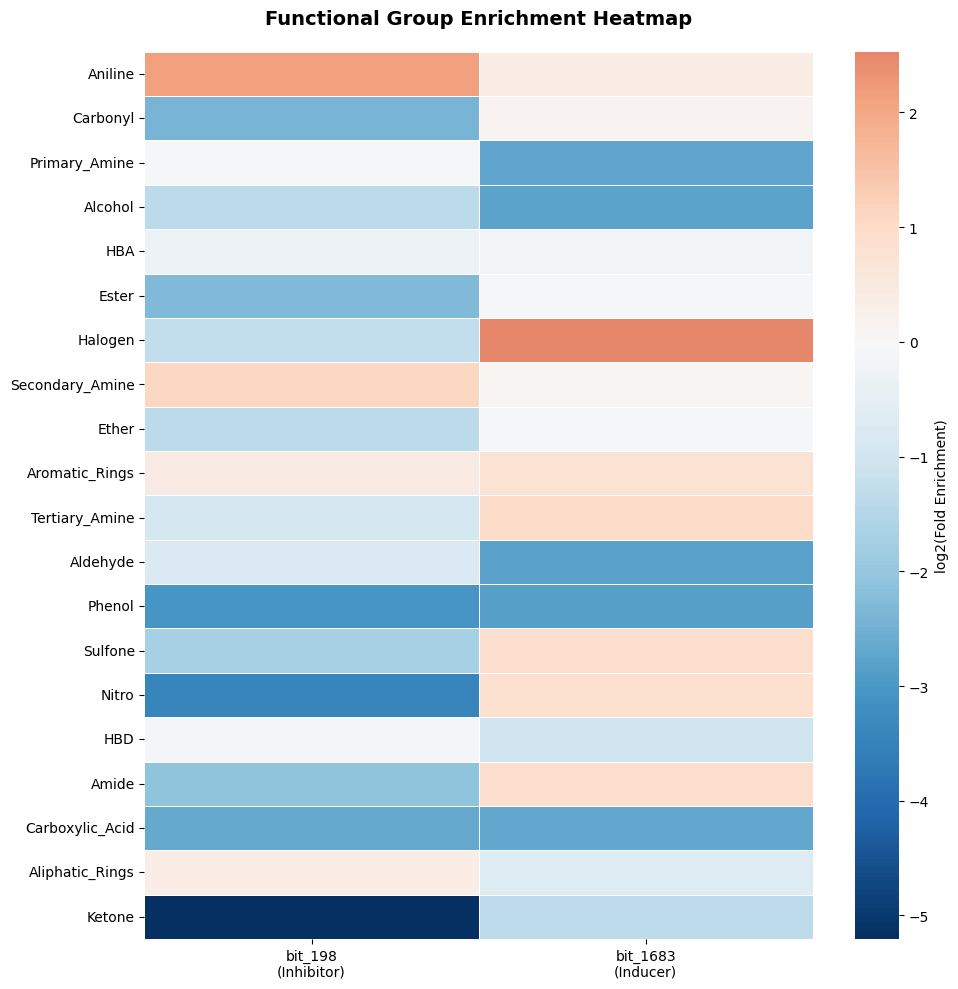

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

all_features = list(set(bit_198['Functional_Group'].tolist() + bit_1683['Functional_Group'].tolist()))
data_matrix = []

for feature in all_features:
    row_198 = bit_198[bit_198['Functional_Group'] == feature]
    row_1683 = bit_1683[bit_1683['Functional_Group'] == feature]
    
    fold_198 = row_198['Fold_Change'].values[0] if len(row_198) > 0 else 1.0
    fold_1683 = row_1683['Fold_Change'].values[0] if len(row_1683) > 0 else 1.0
    
    data_matrix.append([fold_198, fold_1683])

data_matrix = np.array(data_matrix)
norm_data = np.log2(data_matrix)

sns.heatmap(norm_data, annot=False, cmap='RdBu_r', center=0, 
            yticklabels=all_features, xticklabels=['bit_198\n(Inhibitor)', 'bit_1683\n(Inducer)'],
            cbar_kws={'label': 'log2(Fold Enrichment)'}, linewidths=0.5)

ax.set_title('Functional Group Enrichment Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('functional_group_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()